# I - Data description

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [11]:
ccu_data = pd.read_csv("CCUse.csv")
ccu_data.head()

,CUST_ID,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,...,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,Loyalty,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,C10001,3044.993177,12,11.006688,0.0,2168.506639,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.0,0.0,2168.506639,1,NaN,NaN,NaN
1,C10002,81.927748,12,0.985254,0.0,1779.354561,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.0,0.0,1779.354561,0,NaN,NaN,NaN
2,C10003,1345.213562,12,2.830550,0.0,0.000000,0.0,163.266045,0.0,1590.748309,...,0.00000,0.000000,0.000000,0.0,0.0,1754.014354,0,NaN,NaN,NaN
3,C10004,3193.925166,12,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0,NaN,NaN,NaN
4,C10005,284.286718,7,11.757291,0.0,189.991137,0.0,628.363089,0.0,0.000000,...,29.83154,58.269684,61.882977,0.0,0.0,968.338427,0,NaN,NaN,NaN


In [12]:
ccu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18971 entries, 0 to 18970
Data columns (total 23 columns):
CUST_ID             18971 non-null object
AVG_BALANCE         18971 non-null float64
TENURE              18971 non-null int64
NUM_TRANS           18971 non-null float64
ACCESSORIES         18971 non-null float64
APPLIANCES          18971 non-null float64
CULTURE             18971 non-null float64
GAS                 18971 non-null float64
BOOKS               18971 non-null float64
APPAREL             18971 non-null float64
FITNESS             18971 non-null float64
EDUCATION           18971 non-null float64
ENTERTAINMENT       18971 non-null float64
FOOD                18971 non-null float64
HEALTH              18971 non-null float64
HOME_GARDEN         18971 non-null float64
TELCOS              18971 non-null float64
TRAVEL              18971 non-null float64
PURCHASES_AMOUNT    18971 non-null float64
Loyalty             18971 non-null int64
Unnamed: 20         0 non-null float

In [13]:
ccu_data.isnull().sum()

CUST_ID                 0
AVG_BALANCE             0
TENURE                  0
NUM_TRANS               0
ACCESSORIES             0
APPLIANCES              0
CULTURE                 0
GAS                     0
BOOKS                   0
APPAREL                 0
FITNESS                 0
EDUCATION               0
ENTERTAINMENT           0
FOOD                    0
HEALTH                  0
HOME_GARDEN             0
TELCOS                  0
TRAVEL                  0
PURCHASES_AMOUNT        0
Loyalty                 0
Unnamed: 20         18971
Unnamed: 21         18971
Unnamed: 22         18971
dtype: int64

In [14]:
# Dropping the Missing Values
ccu_data.drop(['CUST_ID', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], axis=1, inplace=True)
ccu_data.shape

(18971, 19)

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
X= np.asarray(ccu_data)
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    # sse
    cost.append(kmean.inertia_)
    # silouhaite
    sil.append(silhouette_score(X, kmean.labels_, metric='euclidean')) 

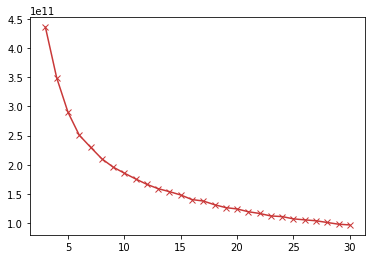

In [18]:
import matplotlib.pyplot as plt
plt.plot(np.arange(2,30), cost,'bx-', color = '#C93838');

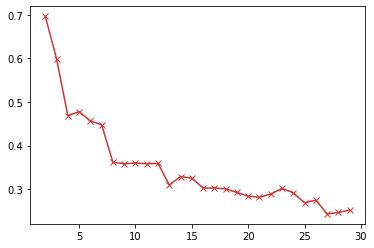

In [17]:
plt.plot(np.arange(2,30), sil, 'bx-',color = '#C93838',);

In [6]:
ccu_data.describe()

,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,Loyalty
count,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000,18971.000000
mean,2249.452492,11.380844,18.958663,176.550591,219.658791,5.752077,105.000328,31.895330,477.696821,2.832551,8.918849,117.170542,185.198246,101.402031,117.694776,158.549602,181.244353,1889.564885,0.271731
std,2427.725837,1.475461,35.547900,776.653112,1006.845712,103.433531,570.157654,657.165345,1377.344385,70.806753,322.943875,1653.570132,829.939338,556.363883,555.764488,667.880298,988.000963,3742.657009,0.444863
min,0.000000,6.000000,-0.978886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,512.468509,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1375.580590,12.000000,7.273754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,997.399757,0.000000
75%,3135.047806,12.000000,24.951448,78.637835,62.567827,0.000000,0.000000,0.000000,488.024294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2333.731238,1.000000
max,27615.333100,12.000000,1301.278768,34398.478270,49262.115400,8767.027535,19416.925120,79068.886770,70464.649950,6557.900496,38718.098730,149716.892800,48731.644070,20979.621510,14901.723570,27035.769190,59238.414520,166608.319100,1.000000


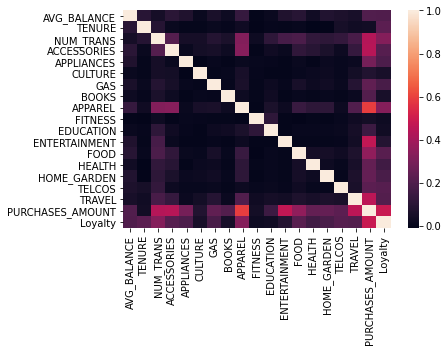

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(ccu_data.corr());

In [9]:
ccu_data.corr()

,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,Loyalty
AVG_BALANCE,1.000000,0.097542,0.047497,0.103256,0.073383,0.014100,0.059228,0.028333,0.135245,0.000892,0.016226,0.073823,0.093045,0.036721,0.080064,0.066202,0.053291,0.203223,0.200118
TENURE,0.097542,1.000000,0.091020,0.014585,0.005022,0.003830,0.014461,0.008011,0.030532,-0.004759,0.006527,0.005422,0.011911,-0.010127,-0.004930,0.051415,0.035218,0.041074,0.228627
NUM_TRANS,0.047497,0.091020,1.000000,0.213623,0.047567,0.048938,0.084598,0.062649,0.322521,0.028713,0.112844,0.175912,0.188929,0.122570,0.109448,0.127815,0.182427,0.436394,0.327790
ACCESSORIES,0.103256,0.014585,0.213623,1.000000,0.017364,0.041686,0.049210,0.027089,0.330098,-0.002228,0.031287,0.017088,0.117410,0.096005,0.063548,0.022882,0.134471,0.446603,0.216413
APPLIANCES,0.073383,0.005022,0.047567,0.017364,1.000000,-0.004427,0.011625,0.000341,0.014611,0.011806,0.006156,-0.001345,0.014727,-0.001554,0.017981,0.010076,0.020883,0.292884,0.194100
CULTURE,0.014100,0.003830,0.048938,0.041686,-0.004427,1.000000,0.004173,0.009796,0.053285,0.008625,0.000312,0.001578,0.012411,0.019554,0.021738,0.009853,0.041712,0.079605,0.056201
GAS,0.059228,0.014461,0.084598,0.049210,0.011625,0.004173,1.000000,0.008791,0.058460,0.001744,0.021966,0.009373,0.055364,0.021578,0.035925,0.013956,0.089829,0.241946,0.182466
BOOKS,0.028333,0.008011,0.062649,0.027089,0.000341,0.009796,0.008791,1.000000,0.028036,0.004280,0.029961,0.001391,0.012636,0.004282,0.010343,0.005281,0.018609,0.207339,0.053447
APPAREL,0.135245,0.030532,0.322521,0.330098,0.014611,0.053285,0.058460,0.028036,1.000000,-0.000390,0.062039,0.022050,0.140191,0.110238,0.110329,0.021576,0.205884,0.592891,0.325836
FITNESS,0.000892,-0.004759,0.028713,-0.002228,0.011806,0.008625,0.001744,0.004280,-0.000390,1.000000,0.115102,-0.000218,-0.002535,0.002120,0.001007,0.009608,0.030602,0.042276,0.026484


# II - Preprocessing

In [10]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(ccu_data)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

In [11]:
X= np.asarray(normalized_df)

In [12]:
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    # sse
    cost.append(kmean.inertia_)
    # silouhaite
    #print(np.unique(kmean.labels_))
    sil.append(silhouette_score(X, kmean.labels_, metric='euclidean')) 

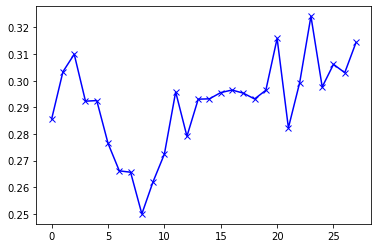

In [13]:
plt.plot(sil, 'bx-')

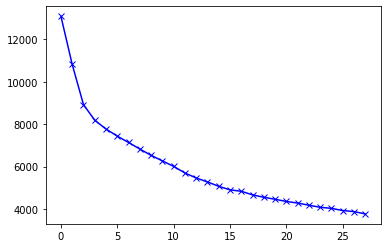

In [14]:
plt.plot(cost, 'bx-')

In [16]:
kmean= KMeans(4)
kmean.fit(X)
labels=kmean.labels_
clusters_Kmeans=pd.concat([ccu_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_Kmeans.dropna(inplace = True)
clusters_Kmeans.to_csv("Kmeans/data.csv", index=False)

## Outliers

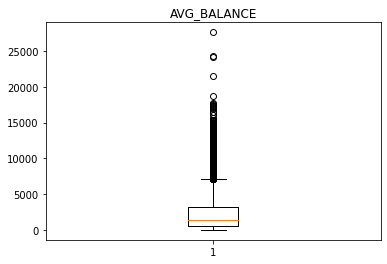

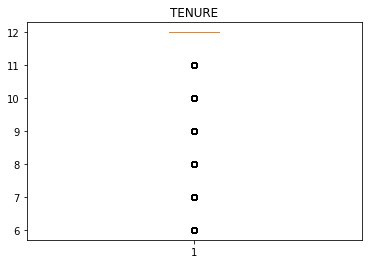

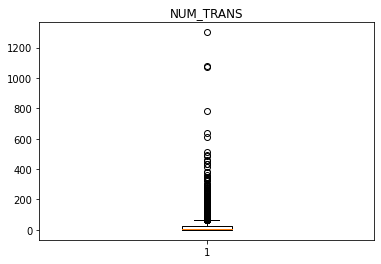

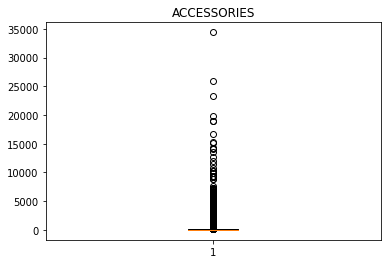

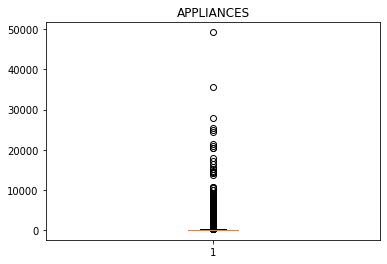

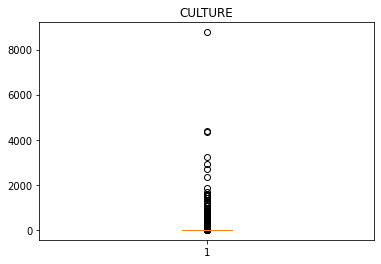

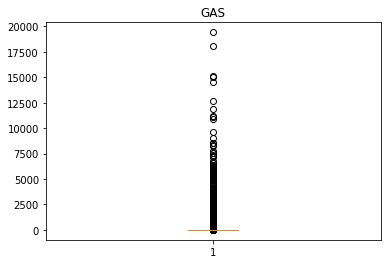

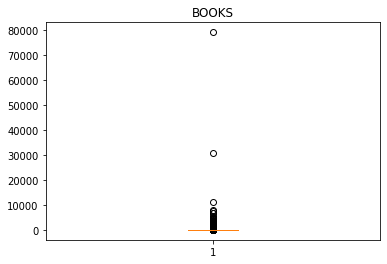

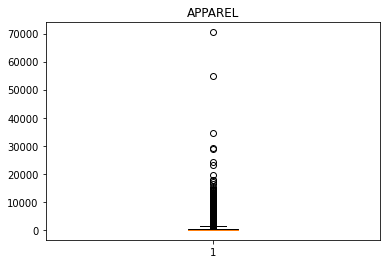

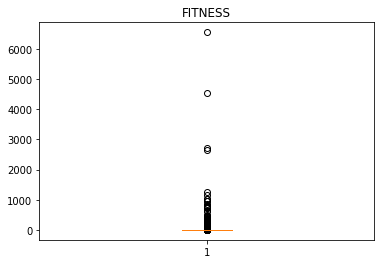

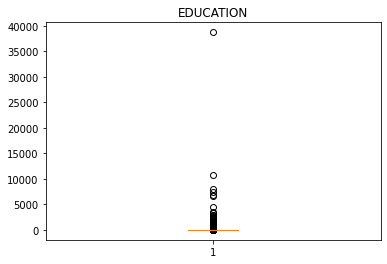

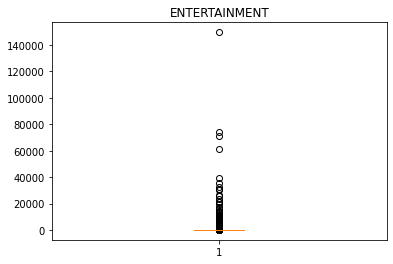

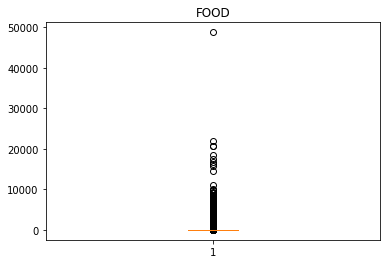

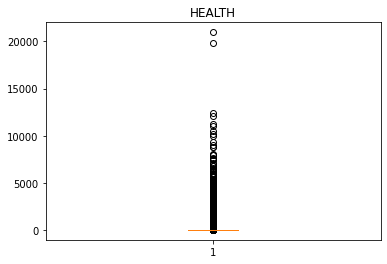

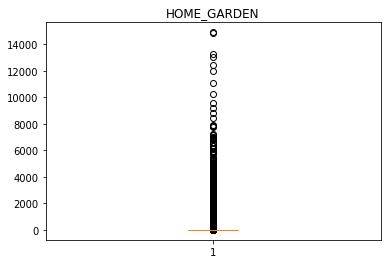

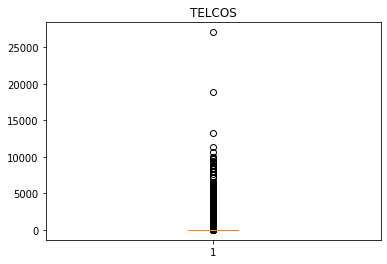

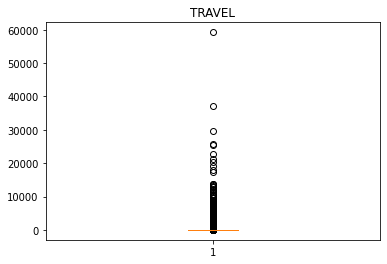

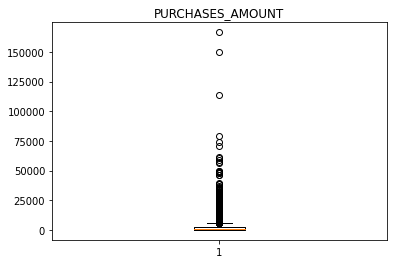

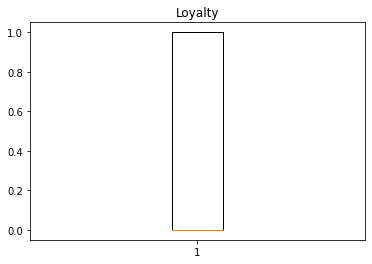

In [23]:
for col in ccu_data:
    plt.boxplot(ccu_data[col])
    plt.title(col)
    plt.show()

In [24]:
ccu_data

,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,Loyalty
0,3044.993177,12,11.006688,0.000000,2168.506639,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2168.506639,1
1,81.927748,12,0.985254,0.000000,1779.354561,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1779.354561,0
2,1345.213562,12,2.830550,0.000000,0.000000,0.0,163.266045,0.0,1590.748309,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1754.014354,0
3,3193.925166,12,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
4,284.286718,7,11.757291,0.000000,189.991137,0.0,628.363089,0.0,0.000000,0.0,0.0,0.000000,29.831540,58.269684,61.882977,0.0,0.0,968.338427,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18966,433.941742,6,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
18967,745.654579,6,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
18968,244.651399,6,3.734193,0.000000,0.000000,0.0,0.000000,0.0,926.602407,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,926.602407,0
18969,395.937201,6,5.452103,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,564.666947,0.000000,0.0,0.0,564.666947,0


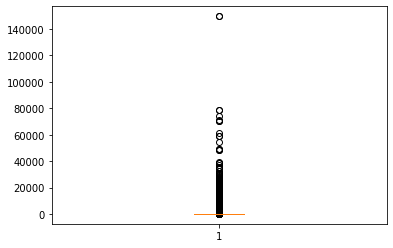

In [25]:
smt = []
columns=['ACCESSORIES', 'APPLIANCES', 'CULTURE', 'GAS', 'BOOKS', 'APPAREL',
        'FITNESS', 'EDUCATION', 'ENTERTAINMENT', 'FOOD', 'HEALTH', 'HOME_GARDEN', 'TELCOS', 'TRAVEL']
for c in columns:
    smt.append(ccu_data[c].max())
    # 149716.8928
    smt.extend(ccu_data[c].values.tolist())
plt.boxplot(smt)
plt.show()

In [26]:
c = 'AVG_BALANCE'
Range=c + '_RANGE'
ccu_data[Range]=0        
ccu_data.loc[((ccu_data[c]>0)&(ccu_data[c]<=2500)),Range]=1
ccu_data.loc[((ccu_data[c]>2500)&(ccu_data[c]<=5000)),Range]=2
ccu_data.loc[((ccu_data[c]>5000)&(ccu_data[c]<=7500)),Range]=3
ccu_data.loc[((ccu_data[c]>7500)&(ccu_data[c]<=10000)),Range]=4
ccu_data.loc[((ccu_data[c]>10000)&(ccu_data[c]<=12500)),Range]=5  
ccu_data.loc[((ccu_data[c]>12500)&(ccu_data[c]<=15000)),Range]=6
ccu_data.loc[((ccu_data[c]>15000)&(ccu_data[c]<=17500)),Range]=7
ccu_data.loc[((ccu_data[c]>17500)&(ccu_data[c]<=20000)),Range]=8
ccu_data.loc[((ccu_data[c]>20000)),Range]=9


c = 'NUM_TRANS'
Range=c + '_RANGE'
ccu_data[Range]=0        
ccu_data.loc[((ccu_data[c]>0)&(ccu_data[c]<=100)),Range]=1
ccu_data.loc[((ccu_data[c]>100)&(ccu_data[c]<=200)),Range]=2
ccu_data.loc[((ccu_data[c]>200)&(ccu_data[c]<=300)),Range]=3
ccu_data.loc[((ccu_data[c]>300)&(ccu_data[c]<=400)),Range]=4
ccu_data.loc[((ccu_data[c]>400)&(ccu_data[c]<=500)),Range]=5  
ccu_data.loc[((ccu_data[c]>500)&(ccu_data[c]<=600)),Range]=6
ccu_data.loc[((ccu_data[c]>600)),Range]=7

columns=['ACCESSORIES', 'APPLIANCES', 'CULTURE', 'GAS', 'BOOKS', 'APPAREL',
        'FITNESS', 'EDUCATION', 'ENTERTAINMENT', 'FOOD', 'HEALTH', 'HOME_GARDEN', 'TELCOS', 'TRAVEL']

for c in columns:
    
    Range=c+'_RANGE'
    ccu_data[Range]=0
    ccu_data.loc[((ccu_data[c]>0)&(ccu_data[c]<=10000)),Range]=1
    ccu_data.loc[((ccu_data[c]>10000)&(ccu_data[c]<=20000)),Range]=2
    ccu_data.loc[((ccu_data[c]>20000)&(ccu_data[c]<=30000)),Range]=3
    ccu_data.loc[((ccu_data[c]>30000)&(ccu_data[c]<=40000)),Range]=4
    ccu_data.loc[((ccu_data[c]>40000)),Range]=5
    

c = 'PURCHASES_AMOUNT'
Range=c + '_RANGE'
ccu_data[Range]=0        
ccu_data.loc[((ccu_data[c]>0)&(ccu_data[c]<=10000)),Range]=1
ccu_data.loc[((ccu_data[c]>20000)&(ccu_data[c]<=200)),Range]=2
ccu_data.loc[((ccu_data[c]>200)&(ccu_data[c]<=300)),Range]=3
ccu_data.loc[((ccu_data[c]>300)&(ccu_data[c]<=400)),Range]=4
ccu_data.loc[((ccu_data[c]>400)&(ccu_data[c]<=500)),Range]=5  
ccu_data.loc[((ccu_data[c]>500)&(ccu_data[c]<=600)),Range]=6
ccu_data.loc[((ccu_data[c]>600)),Range]=7

ccu_data.drop(['AVG_BALANCE', 'NUM_TRANS', 'ACCESSORIES', 'APPLIANCES', 
           'CULTURE', 'GAS', 'BOOKS', 'APPAREL','FITNESS', 'EDUCATION', 
           'ENTERTAINMENT', 'FOOD', 'HEALTH', 'HOME_GARDEN', 'TELCOS', 
           'TRAVEL', 'PURCHASES_AMOUNT' ], axis=1, inplace=True)

## Normal scaling

In [27]:
X= np.asarray(ccu_data)
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(18971, 19)

## Parameter tuning using sse and elbow criteria

In [28]:
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    # sse
    cost.append(kmean.inertia_)
    # silouhaite
    #print(np.unique(kmean.labels_))
    sil.append(silhouette_score(X, kmean.labels_, metric='euclidean')) 

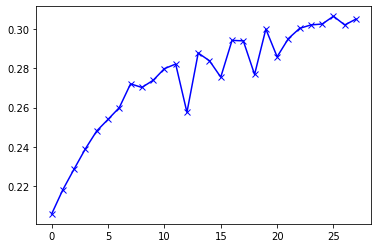

In [29]:
plt.plot(sil, 'bx-', ,color = '#C93838')

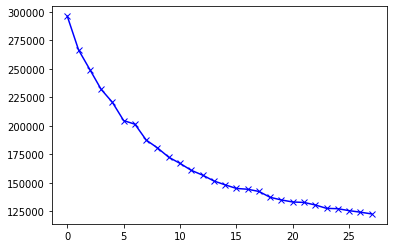

In [26]:
plt.plot(cost, 'bx-')

## Kmeans with K=5

In [21]:
kmean= KMeans(7)
kmean.fit(X)
labels=kmean.labels_

## Interpretation of Clusters

In [22]:
clusters=pd.concat([ccu_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.dropna(inplace = True)
clusters.head()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE,cluster
0,12,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,4
1,12,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,4
2,12,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,7,4
3,12,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,7,4


In [23]:
clusters.groupby('cluster').mean()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE
cluster,,,,,,,,,,,,,,,,,,,
0,11.245055,0.000000,1.620035,0.022994,0.000643,0.000161,0.000000,0.000161,0.000161,0.000322,0.0,0.000000,0.000000,0.001126,0.000643,0.000804,0.000000,0.000161,0.004181
1,11.642824,0.502118,1.434353,1.071529,0.563294,0.500235,0.000000,0.300235,0.000471,0.780235,0.0,0.023529,0.311059,0.414118,0.288000,0.342118,0.322824,0.996706,6.950118
2,11.602899,0.582609,1.565217,1.200000,0.800000,0.530435,1.000000,0.246377,0.339130,0.924638,0.0,0.028986,0.313043,0.533333,0.405797,0.573913,0.286957,0.385507,6.962319
3,11.668413,0.566617,1.467066,1.116018,0.696856,0.585329,0.000000,0.311377,1.005240,0.859281,0.0,0.042665,0.367515,0.559132,0.380988,0.464072,0.321108,0.455838,6.934132
4,11.276920,0.334337,1.469503,1.010166,0.056852,0.390060,0.000000,0.143449,0.005836,0.330949,0.0,0.003953,0.081514,0.169239,0.112575,0.127259,0.223080,0.041980,6.829443
5,11.473952,0.365269,1.467665,1.043413,0.918263,0.421557,0.000000,0.161377,0.000000,0.927545,0.0,0.003892,0.111078,0.461078,0.311078,0.374551,0.191018,0.000000,6.909880
6,11.612245,0.455782,1.299320,1.136054,0.547619,0.697279,0.064626,0.285714,0.346939,0.693878,1.0,0.071429,0.431973,0.384354,0.261905,0.380952,0.476190,0.530612,6.646259


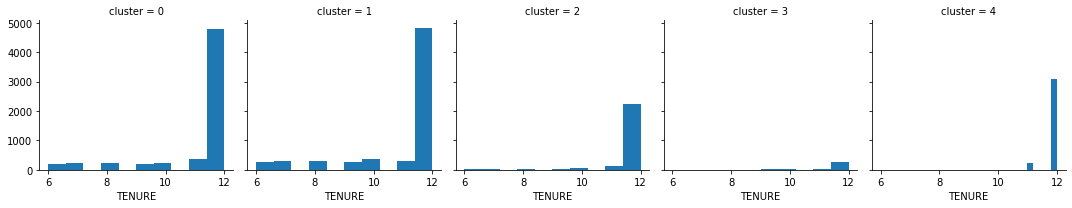

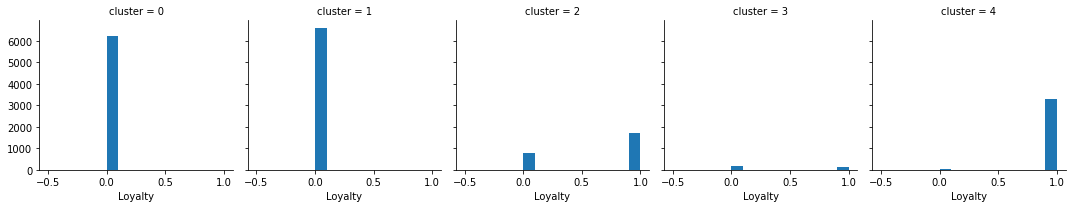

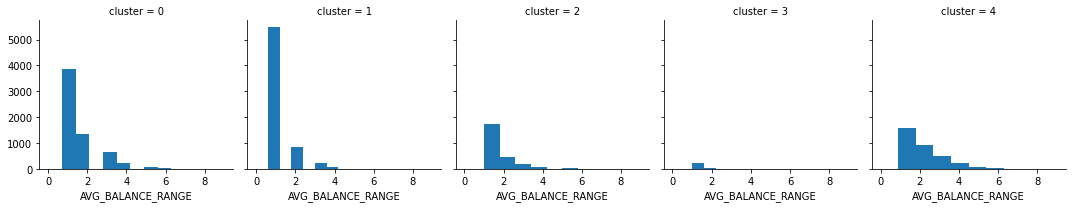

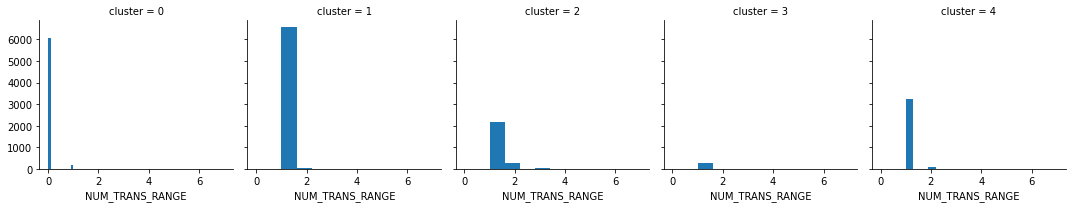

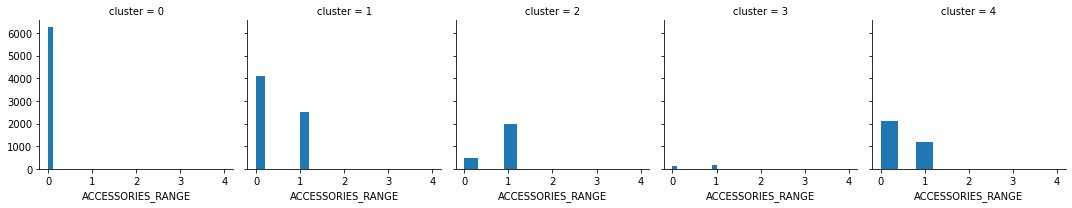

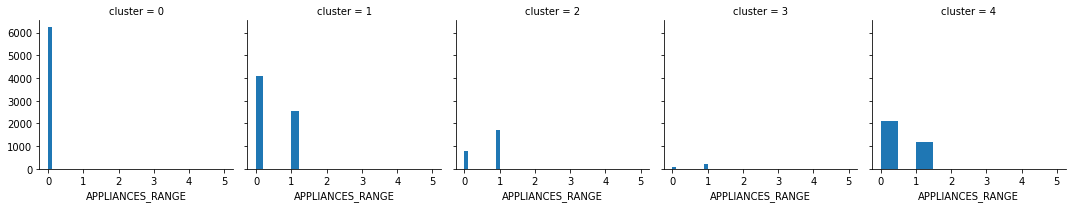

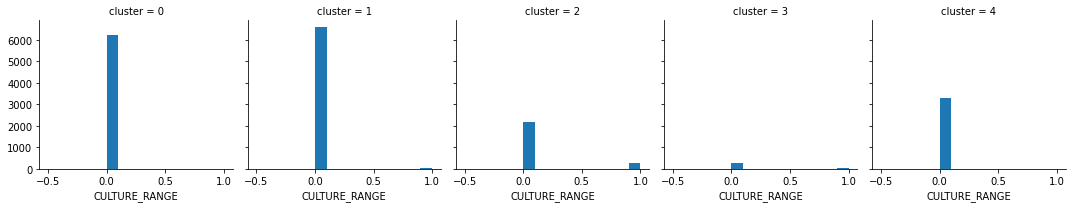

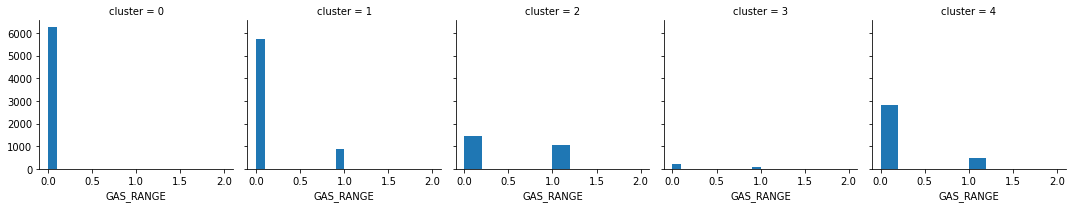

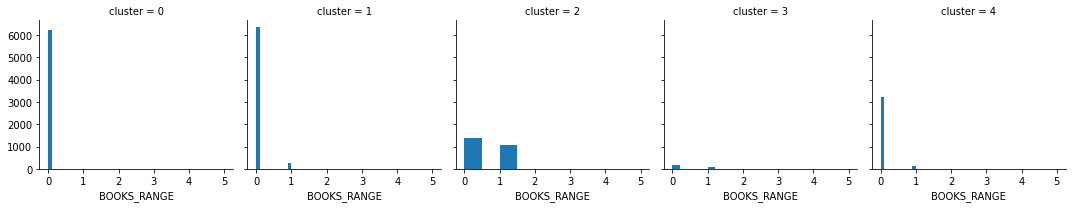

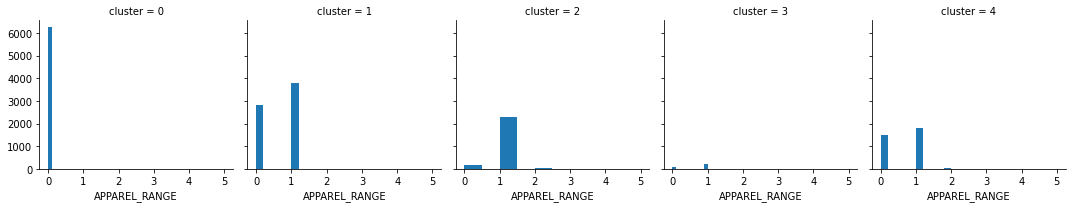

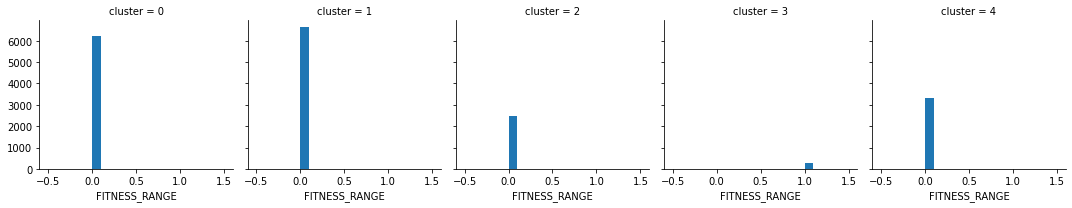

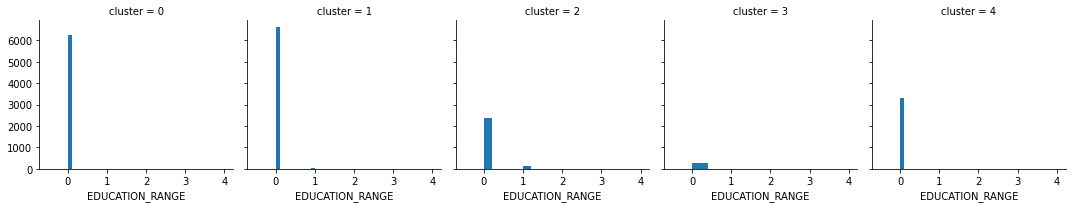

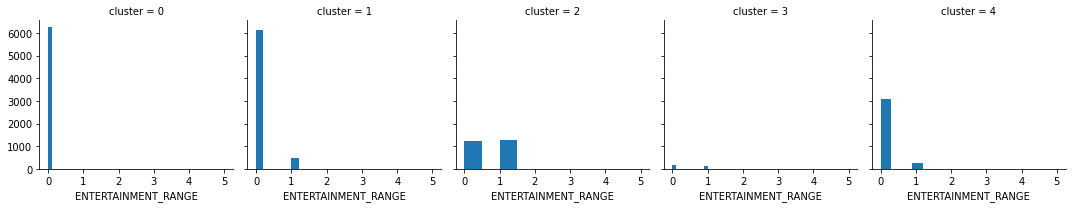

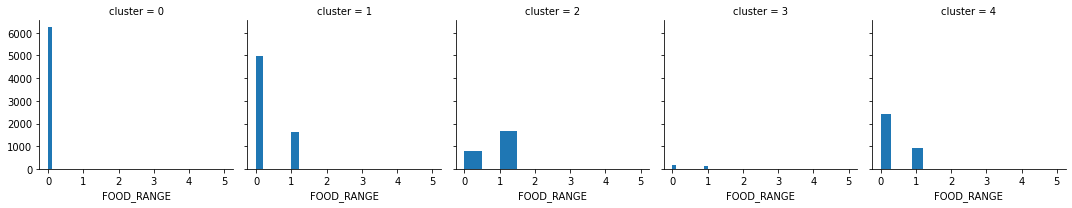

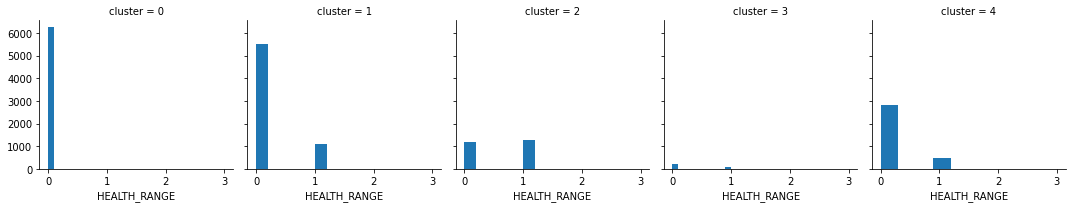

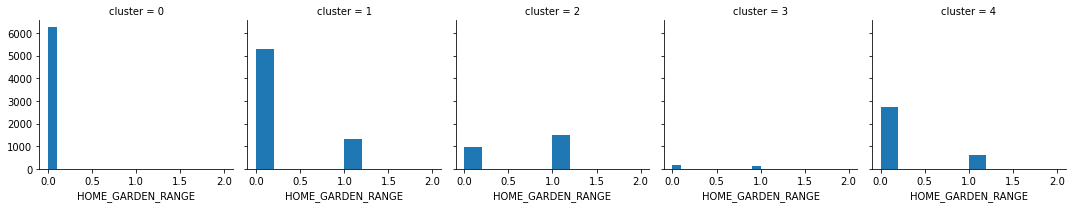

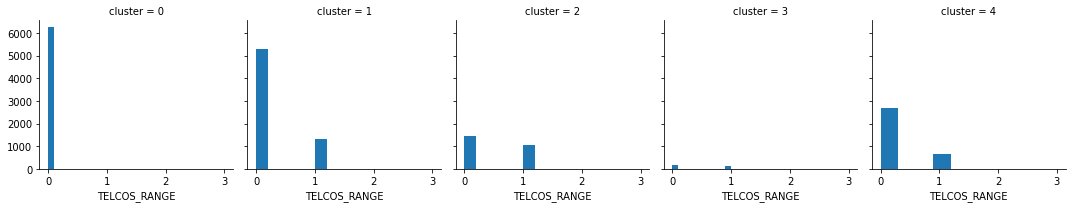

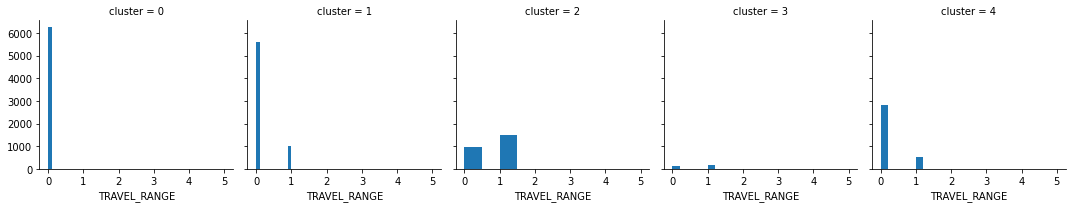

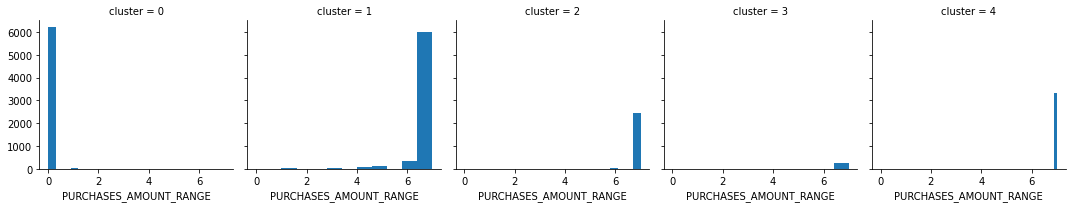

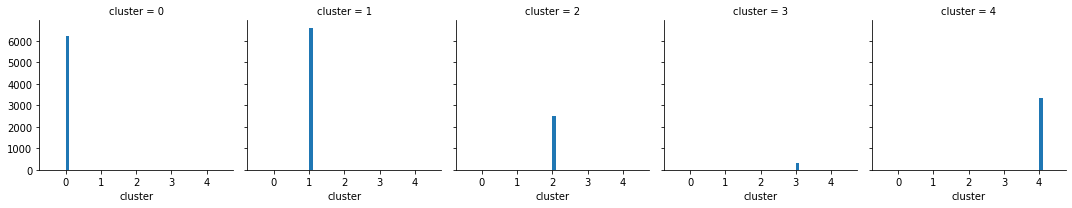

In [16]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [18]:
X.shape

(18971, 19)

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [19]:
ccu_data = pd.read_csv("CCUse.csv")
ccu_data.drop(['CUST_ID', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], axis=1, inplace=True)
ccu_data.dropna(inplace = True)

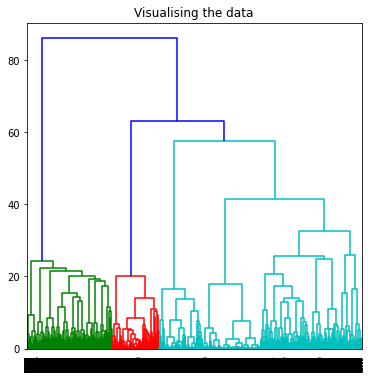

In [20]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(ccu_data)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_df, method ='ward', metric= 'euclidean')))

In [21]:
#silhouette_scores = [np.nan,np.nan] 
sil = []
cost = []
for n_cluster in range(2, 10):
    sil.append(silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df)))
    #cost.append(AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df).inertia_)

In [22]:
n_cluster = 10
sil.append(silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df)))

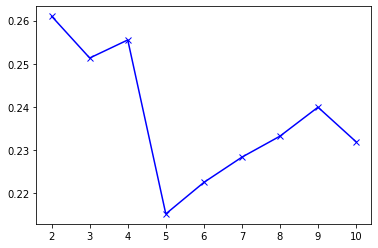

In [23]:
plt.plot(np.arange(2,11), sil, 'bx-')

In [24]:
agg = AgglomerativeClustering(n_clusters = 6).fit_predict(normalized_df)
clusters=pd.concat([ccu_data, pd.DataFrame({'cluster':agg})], axis=1)
clusters.dropna(inplace = True)
clusters.head()

,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,Loyalty,cluster
0,3044.993177,12,11.006688,0.0,2168.506639,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,2168.506639,1,1
1,81.927748,12,0.985254,0.0,1779.354561,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1779.354561,0,2
2,1345.213562,12,2.830550,0.0,0.000000,0.0,163.266045,0.0,1590.748309,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1754.014354,0,2
3,3193.925166,12,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0,4
4,284.286718,7,11.757291,0.0,189.991137,0.0,628.363089,0.0,0.000000,0.0,0.0,0.0,29.83154,58.269684,61.882977,0.0,0.0,968.338427,0,5


In [26]:
clusters_H=pd.concat([ccu_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_H.dropna(inplace = True)
clusters_H.to_csv("Hierach/data.csv", index=False)

In [43]:
clusters.groupby('cluster').mean()

,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,Loyalty
cluster,,,,,,,,,,,,,,,,,,,
0,1886.569473,11.944125,21.150570,106.619977,120.667500,0.844235,902.005173,18.397560,307.848989,0.966885,7.977174,55.488957,121.943225,948.409502,51.475775,79.102961,117.195517,2838.943428,0.457683
1,3032.702004,11.873913,38.464214,504.492322,565.955410,21.362066,123.983946,104.922073,1257.915820,10.464092,30.932387,379.608518,499.797124,82.692135,298.838543,409.995200,540.174513,4831.134147,0.951553
2,1039.206773,11.877396,25.229090,111.896992,156.203787,0.618562,13.700471,10.128889,320.031104,0.179784,1.475552,37.208460,104.962081,20.912498,131.207712,174.536748,94.726264,1177.788903,0.000223
3,5535.974924,11.697559,4.367328,28.802392,24.025993,0.454502,10.015870,1.857869,89.161116,0.006747,0.059324,6.734240,39.872074,4.851600,5.617771,29.860555,18.075540,259.395593,0.000000
4,1341.011867,12.000000,0.424480,2.288382,2.165334,0.000000,0.264217,0.401987,10.460492,0.005349,0.000000,0.525250,1.299622,0.517707,0.681654,0.576402,0.459696,19.646093,0.000000
5,1197.102839,8.351845,8.569493,75.908655,194.074191,0.388756,77.833706,9.188359,345.106850,0.438829,1.239331,51.008595,141.409642,97.954773,45.583340,27.666989,80.712528,1148.514545,0.000373


In [27]:
kmean= KMeans(800)
kmean.fit(X)
labels=kmean.labels_

In [28]:
Kmeans_clusters=pd.concat([ccu_data, pd.DataFrame({'cluster':labels})], axis=1)
Kmeans_clusters.dropna(inplace = True)
Kmeans_clusters.head()

,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,Loyalty,cluster
0,3044.993177,12,11.006688,0.0,2168.506639,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,2168.506639,1,190
1,81.927748,12,0.985254,0.0,1779.354561,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1779.354561,0,17
2,1345.213562,12,2.830550,0.0,0.000000,0.0,163.266045,0.0,1590.748309,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1754.014354,0,788
3,3193.925166,12,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0,220
4,284.286718,7,11.757291,0.0,189.991137,0.0,628.363089,0.0,0.000000,0.0,0.0,0.0,29.83154,58.269684,61.882977,0.0,0.0,968.338427,0,584


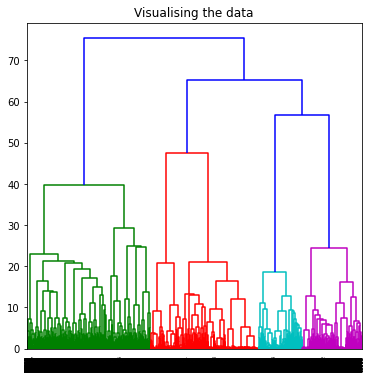

In [29]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(Kmeans_clusters)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_df, method ='ward', metric= 'euclidean')))

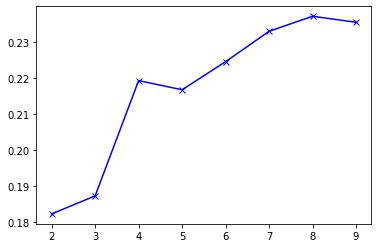

In [30]:
sil = []
cost = []
for n_cluster in range(2, 10):
    sil.append(silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df)))
    #cost.append(AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df).inertia_)
    

plt.plot(np.arange(2,10), sil, 'bx-')

In [31]:
agg = AgglomerativeClustering(n_clusters = 8).fit_predict(normalized_df)

In [32]:
clusters=pd.concat([ccu_data, pd.DataFrame({'cluster':agg})], axis=1)
clusters.dropna(inplace = True)
clusters.head()

,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,Loyalty,cluster
0,3044.993177,12,11.006688,0.0,2168.506639,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,2168.506639,1,5
1,81.927748,12,0.985254,0.0,1779.354561,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1779.354561,0,1
2,1345.213562,12,2.830550,0.0,0.000000,0.0,163.266045,0.0,1590.748309,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1754.014354,0,2
3,3193.925166,12,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0,1
4,284.286718,7,11.757291,0.0,189.991137,0.0,628.363089,0.0,0.000000,0.0,0.0,0.0,29.83154,58.269684,61.882977,0.0,0.0,968.338427,0,3


In [34]:
clusters.to_csv("Kmean_Hierach/data.csv", index=False)

In [36]:
clusters.groupby('cluster').mean()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE
cluster,,,,,,,,,,,,,,,,,,,
0,11.867583,0.000000,1.657508,0.013165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11.873399,0.414197,1.574460,1.004025,0.392243,0.433955,0.000000,0.000000,0.000000,0.598244,0.000000,0.00000,0.000000,0.293085,0.000000,0.000000,0.000000,0.000000,6.829491
2,7.711934,0.000000,1.352734,0.471487,0.161082,0.180482,0.000000,0.002352,0.000000,0.245738,0.000000,0.00000,0.021164,0.084068,0.004703,0.079953,0.052910,0.051146,2.944738
3,11.654075,0.531826,1.385485,1.112433,0.614515,0.557406,0.108269,0.287626,0.464010,0.773647,0.087448,0.05116,0.621356,0.474123,0.335812,0.408983,0.335812,0.442296,6.906901
4,11.880184,0.366359,1.407834,1.025346,0.314900,0.409370,0.000000,0.000000,0.000000,0.479263,0.000000,0.00000,0.000000,0.220430,0.199693,0.205069,1.003072,0.062980,6.875576
5,11.518746,0.415133,1.411725,1.019768,0.381050,0.457396,0.000000,1.006135,0.000000,0.567144,0.000000,0.00000,0.002045,0.396728,0.188821,0.254942,0.239264,0.239264,6.903204
6,11.098436,0.291628,1.389144,1.026679,0.507820,0.322907,0.000000,0.012879,0.000000,0.643974,0.000000,0.00000,0.002760,0.276909,1.006440,0.257590,0.005520,0.047838,6.864765
7,11.804139,0.400385,1.612127,1.062560,0.483638,0.381136,0.000000,0.030799,0.016843,0.662656,0.000000,0.00000,0.028874,0.318576,0.101540,0.556785,0.141963,0.568335,6.898941
